<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/LSTM_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dane spółki Apple Inc. AAPL
Te dane to historyczne notowania akcji spółki Apple Inc. (AAPL). Każdy wiersz reprezentuje dane z jednego dnia notowań giełdowych, a poszczególne kolumny oznaczają:

Date – data notowania.

Open – cena otwarcia akcji w danym dniu.

High – najwyższa cena, jaką osiągnęła akcja w trakcie dnia.

Low – najniższa cena, jaką osiągnęła akcja w trakcie dnia.

Close – cena zamknięcia akcji na koniec dnia.

Volume – liczba akcji, które zmieniły właściciela (wolumen obrotu).

Adj Close – cena zamknięcia skorygowana o zdarzenia takie jak dywidendy czy podziały akcji (adjusted close).

📌 Co to jest akcja i jak działa?
Akcja to po prostu udział w firmie. Kiedy kupujesz akcję, stajesz się współwłaścicielem tej firmy.

✅ Jak zarabia się na akcjach?

Cena akcji rośnie → Kupujesz taniej, sprzedajesz drożej = zysk 📈💰

Dywidendy → Firma dzieli się zyskami i wypłaca pieniądze akcjonariuszom (nie każda firma to robi!)

📌 Co to są dywidendy?
Dywidenda to część zysku firmy, którą firma wypłaca akcjonariuszom.

💡 Przykład:
Masz 10 akcji firmy X, która wypłaca dywidendę 5 zł na akcję.
➡ Dostajesz 10 × 5 zł = 50 zł co roku (lub kwartalnie, zależy od firmy).

🔹 Nie wszystkie firmy wypłacają dywidendy – niektóre wolą inwestować w rozwój zamiast dzielić się zyskami.



Akcja = udział w firmie

Możesz zarabiać na wzroście ceny lub dywidendach

Podział akcji = więcej akcji, ale tańszych (firma nie traci na wartości)

# Import Bibliotek

In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
# from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch


# PART 1: Przygotowanie danych – obliczanie różnicowania i tworzenie kolumny Adj Close


W tej części kodu dane historycznych notowań akcji są wstępnie przetwarzane. Z oryginalnego zestawu danych usuwane są niepotrzebne kolumny (Open, High, Low, Volume).

 Dodana kolumna Adj Close (skorygowana cena zamknięcia) jest kopiowana z kolumny Close – ta kolumna uwzględnia ewentualne korekty wynikające z dywidend czy podziałów akcji. Następnie obliczana jest różnica między kolejnymi wartościami tej kolumny, a uzyskane wartości NaN (wynikające z operacji różnicowania) są uzupełniane oryginalnymi wartościami, aby umożliwić późniejsze odwrócenie transformacji przy użyciu sumy skumulowanej.

**Czym jest pandas.diff() i jak działa?**

Funkcja diff() oblicza różnicę między bieżącą wartością a wartością z określonego kroku wstecz.

In [13]:

# Wczytujemy dane z pliku CSV (np. AAPL.csv)
data = pd.read_csv('sample_data/AAPLv2.csv')

# Wyświetlamy nazwy kolumn, aby zweryfikować strukturę danych
print("Nazwy kolumn w oryginalnym DataFrame:", data.columns.tolist())

# Wybieramy interesujące kolumny:
# Usuwamy kolumny: 'Open', 'High', 'Low', 'Volume'
data_feature_selected = data.drop(axis=1, labels=['Open', 'High', 'Low', 'Volume'])

# Dodajemy kolumnę 'Adj Close' kopiując wartość z kolumny 'Close'
data_feature_selected['Adj Close'] = data_feature_selected['Close']

# Obliczamy różnicę między kolejnymi wartościami 'Adj Close'
# Funkcja diff() oblicza różnicę między kolejnymi obserwacjami
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values

# Uzupełniamy wartości NaN, które powstały po różnicowaniu:
# Dla pierwszego rekordu (NaN) zastępujemy oryginalną wartością 'Adj Close'
data_feature_selected['differenced_demand_filled'] = np.where(
    pd.isnull(data_feature_selected['differenced_trasnformation_demand']),
    data_feature_selected['Adj Close'],
    data_feature_selected['differenced_trasnformation_demand']
)

# Wyświetlamy kilka pierwszych wierszy, aby zweryfikować wynik operacji
print("Po differencingu i uzupełnianiu braków:")
print(data_feature_selected.head())

# Odwracamy operację różnicowania przez obliczenie sumy skumulowanej
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()

# Testujemy, czy odwrócenie operacji różnicowania przywraca oryginalne wartości 'Adj Close'
np.testing.assert_array_equal(
    data_feature_selected['Adj Close'].values,
    data_feature_selected['differenced_inv_transformation_demand'].values
)

# Wyświetlamy DataFrame po odwróceniu transformacji
print("Po odwróceniu różnicowania:")
print(data_feature_selected.head())


Nazwy kolumn w oryginalnym DataFrame: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Po differencingu i uzupełnianiu braków:
         Date   Close  Adj Close  differenced_trasnformation_demand  \
0  2008-10-14  104.08     104.08                                NaN   
1  2008-10-13  110.26     110.26                               6.18   
2  2008-10-10   96.80      96.80                             -13.46   
3  2008-10-09   88.74      88.74                              -8.06   
4  2008-10-08   89.79      89.79                               1.05   

   differenced_demand_filled  
0                     104.08  
1                       6.18  
2                     -13.46  
3                      -8.06  
4                       1.05  
Po odwróceniu różnicowania:
         Date   Close  Adj Close  differenced_trasnformation_demand  \
0  2008-10-14  104.08     104.08                                NaN   
1  2008-10-13  110.26     110.26                               6.18   
2  2

# PART: 2 Wizualizacja szeregu różnicowania

**Wykres I:**

Pierwszy wykres przedstawia dwa szeregi czasowe:

Differenced Transformation: To wyniki operacji różnicowania, czyli różnice między kolejnymi wartościami ceny (Adj Close). Pokazuje, jak zmienia się wartość w kolejnych dniach.

Filled Differenced Demand: To seria, w której wartości NaN (powstałe po różnicowaniu, zazwyczaj w pierwszym wierszu) zostały uzupełnione oryginalną wartością. Umożliwia to dalszą analizę bez problemu brakujących danych.

**Wykres II:**

Drugi wykres przedstawia statystyki ruchome dla szeregu różnicowania:

Szary wykres: Same wartości różnicowania (bez pierwszego elementu, bo jest NaN).

Pomarańczowa linia (Rolling Mean): Średnia ruchoma obliczona na oknie 20 obserwacji. Pozwala sprawdzić, czy średnia wartość serii pozostaje względnie stała w czasie.

Żółta linia (Rolling STD): Odchylenie standardowe ruchome obliczone na tym samym oknie 20 obserwacji, co pokazuje zmienność serii.



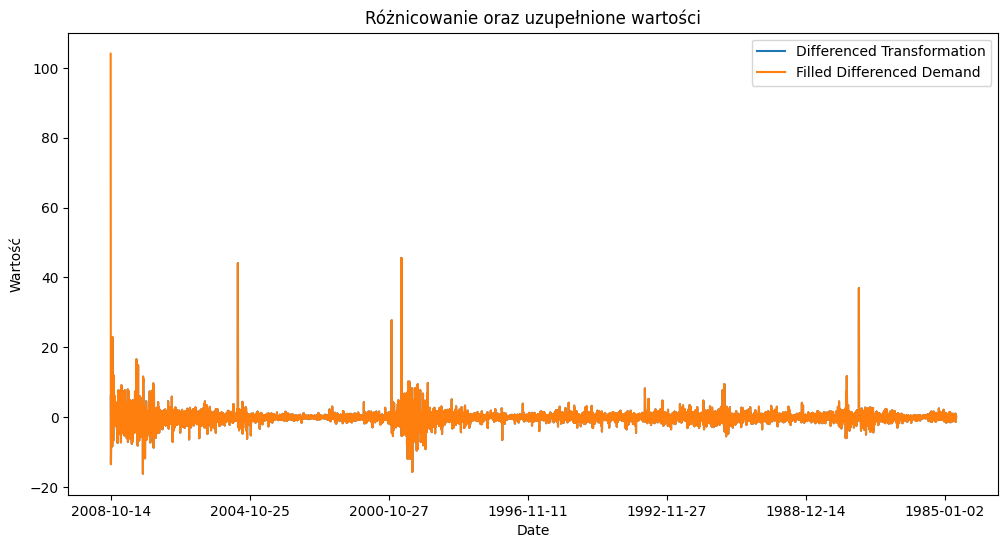

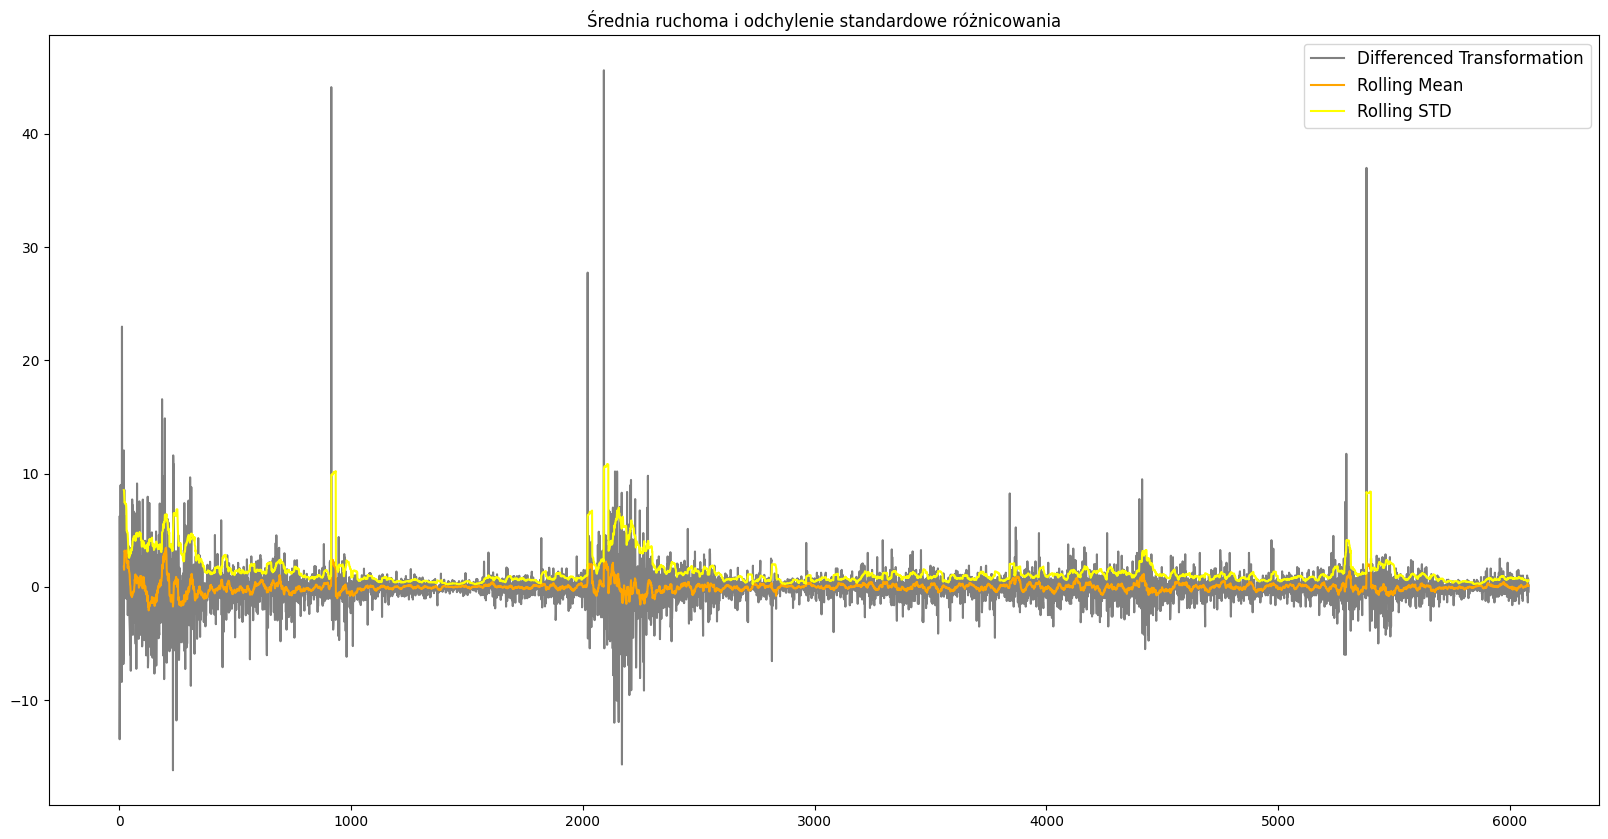

In [14]:
# Wizualizacja szeregu różnicowania
plt.figure(figsize=(12, 6))
# Ustawiamy kolumnę 'Date' jako indeks (upewnij się, że w pliku CSV kolumna dat ma nazwę 'Date')
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(label='Differenced Transformation')
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(label='Filled Differenced Demand')
plt.xlabel('Date')
plt.ylabel('Wartość')
plt.title('Różnicowanie oraz uzupełnione wartości')
plt.legend()
plt.show()

# Wizualizacja statystyk ruchomych (średnia ruchoma i odchylenie standardowe)
fig, ax = plt.subplots(figsize=(20, 10))
# Pomijamy pierwszy element (NaN) i rysujemy wykres różnicowania w kolorze szarym
data_feature_selected['differenced_trasnformation_demand'][1:].plot(ax=ax, color='grey', label='Differenced Transformation')
# Obliczamy i rysujemy średnią ruchomą z oknem 20
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(window=20).mean().plot(ax=ax, color='orange', label='Rolling Mean')
# Obliczamy i rysujemy odchylenie standardowe ruchome z oknem 20
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(window=20).std().plot(ax=ax, color='yellow', label='Rolling STD')
plt.legend(prop={'size': 12})
plt.title('Średnia ruchoma i odchylenie standardowe różnicowania')
plt.show()

# PART 3: Test KPSS na serii

Funkcja kpss_test wykonuje test stacjonarności (KPSS) na zadanym szeregu i wypisuje wyniki testu.

Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin) służy do sprawdzania stacjonarności szeregu czasowego. Stacjonarność oznacza, że statystyczne właściwości danych (średnia, wariancja i autokorelacja) nie zmieniają się w czasie. To bardzo ważna cecha przy modelowaniu szeregów czasowych, ponieważ wiele metod analizy (np. ARIMA) wymaga, aby dane były stacjonarne.

Co to jest stacjonarność?
Stacjonarność oznacza, że:
* ✔️ Średnia wartości w czasie jest stała.
* ✔️ Wariancja (czyli rozrzut wartości) nie zmienia się w czasie.
* ✔️ Brak jest trendu (czyli nie ma długoterminowego wzrostu ani spadku).
*✔️ Brak sezonowości (czyli powtarzających się wzorców np. co miesiąc czy co rok).

Przykłady:

Stacjonarny szereg czasowy – np. losowy szum wokół pewnej wartości.

Niestacjonarny szereg czasowy – np. ceny akcji, które mają trend wzrostowy lub sezonowość.

Jak działa test KPSS?
Test KPSS sprawdza hipotezy:

Hipoteza zerowa (H₀): Szereg czasowy jest stacjonarny.

Hipoteza alternatywna (H₁): Szereg czasowy nie jest stacjonarny.

Jeśli p-wartość < 0.05, oznacza to, że możemy odrzucić hipotezę zerową, czyli szereg NIE jest stacjonarny.
Jeśli p-wartość > 0.05, nie mamy podstaw, by odrzucić H₀, więc szereg może być stacjonarny.

Wniosek z wyników testu KPSS
1.  Interpretacja p-wartości
p-value = 0.1 (czyli większe niż 0.05)

Ponieważ p-wartość jest wyższa niż 0.05, nie mamy podstaw, aby odrzucić hipotezę zerową (H₀).

2. Hipoteza zerowa (H₀) testu KPSS
H₀: Szereg czasowy jest stacjonarny

H₁: Szereg czasowy nie jest stacjonarny

3. Krytyczne wartości KPSS Statistic
KPSS Statistic = 0.0739

Wszystkie wartości krytyczne (10%, 5%, 2.5%, 1%) są dużo wyższe niż nasza statystyka KPSS, co oznacza, że wynik jest daleko od granicy odrzucenia hipotezy zerowej.

4. Wniosek końcowy
📌 Szereg czasowy jest stacjonarny – nie wykazuje trendu ani zmiennej wariancji w czasie.
📌 Nie musimy stosować dodatkowego różnicowania, ponieważ dane spełniają warunek stacjonarności.
📌 Możemy bezpośrednio używać modeli wymagających stacjonarności, np. ARIMA.

In [15]:

from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    """
    Funkcja wykonuje test KPSS na podanym szeregu czasowym i wypisuje statystyki testu.
    """
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

# Wykonujemy test KPSS na uzupełnionej serii różnicowania
kpss_test(data_feature_selected['differenced_demand_filled'])

KPSS Statistic: 0.07388885262484138
p-value: 0.1
num lags: 9
Critical Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: The series is stationary


<ipython-input-15-446660be0df1>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


#PART 4: Budowanie cech czasowych

Funkcja build_temporal_features konwertuje kolumnę Date do formatu datetime, a następnie wyodrębnia z niej cechy takie jak rok, miesiąc, tydzień, dzień, dzień tygodnia, numer tygodnia w miesiącu oraz informację, czy dany dzień to weekend.

Wynikowy DataFrame jest wyświetlany, aby zweryfikować poprawność nowych cech.

In [16]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    """
    Funkcja przyjmuje DataFrame z kolumną 'Date' i dodaje nowe cechy czasowe.

    Dodawane cechy:
      - date: konwersja 'Date' do formatu datetime
      - year: rok
      - month: miesiąc
      - week: numer tygodnia (używamy isocalendar().week)
      - day: dzień miesiąca
      - dayofweek: numer dnia tygodnia (0=poniedziałek)
      - week_of_month: numer tygodnia w miesiącu (obliczany przez podzielenie dnia przez 7 i zaokrąglenie w górę)
      - is_weekend: czy dany dzień to weekend (1 = tak, 0 = nie)
    """
    # Konwersja kolumny 'Date' na datetime
    data['date'] = pd.to_datetime(data['Date'])
    # Ekstrakcja cech czasowych z nowej kolumny 'date'
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    # Używamy metody isocalendar, aby uzyskać numer tygodnia
    data['week'] = data['date'].dt.isocalendar().week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    # Obliczamy numer tygodnia w miesiącu
    data['week_of_month'] = np.ceil(data['day'] / 7).astype(np.int8)
    # Określamy, czy dany dzień jest weekendem (sobota=5, niedziela=6)
    data['is_weekend'] = (data['dayofweek'] > 4).astype(np.int8)
    return data

# Wczytujemy dane ponownie i budujemy cechy czasowe
df1 = pd.read_csv('sample_data/AAPLv2.csv')
df1 = build_temporal_features(df1)
print("Pierwsze wiersze DataFrame z cechami czasowymi:")
print(df1.head())

Pierwsze wiersze DataFrame z cechami czasowymi:
         Date    Open    High     Low   Close    Volume  Adj Close       date  \
0  2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08 2008-10-14   
1  2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26 2008-10-13   
2  2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80 2008-10-10   
3  2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74 2008-10-09   
4  2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79 2008-10-08   

   year  month  week  day  dayofweek  week_of_month  is_weekend  
0  2008     10    42   14          1              2           0  
1  2008     10    42   13          0              2           0  
2  2008     10    41   10          4              2           0  
3  2008     10    41    9          3              2           0  
4  2008     10    41    8          2              2           0  


# PART 5:Model sieci neuronowej dla LSTM Long Short-Term Memory

Tworzy model sekwencyjny

LSTM (150): Warstwa z 150 neuronami do przetwarzania sekwencji danych.

Dropout (0.2): Technika zapobiegająca przeuczeniu (20% neuronów jest "wyłączanych" w trakcie uczenia).

Powtarza warstwy LSTM: 4 warstwy LSTM pozwalają lepiej analizować długoterminowe zależności w danych.

Dense (1): Warstwa wyjściowa – model przewiduje jedną wartość (np. przyszłą cenę akcji).

Kompiluje model

Loss: mean_squared_error → Minimalizuje błąd średniokwadratowy (typowe dla regresji).

Optimizer: Adam → Popularny algorytm do uczenia sieci neuronowych.

Wyświetla podsumowanie modelu (model.summary())

Wnioski:

Model zawiera cztery warstwy LSTM + warstwę wyjściową (Dense).

Dodatkowo zastosowano Dropout po niektórych warstwach LSTM, co redukuje ryzyko przeuczenia.

Całkowita liczba parametrów to 633,151 – co oznacza dość złożony model.

Każda warstwa LSTM ma dużą liczbę parametrów (np. 180,600), co wynika z wielu wag i stanów komórkowych.

Model przyjmuje sekwencje o wymiarach (100, 1) – czyli 100 kroków czasowych z 1 cechą na każdy krok.

Po ostatniej warstwie LSTM wynik ma kształt (150,), czyli reprezentację cech.

Warstwa wyjściowa (Dense) przekształca to na (1,) – czyli jedną przewidywaną wartość (np. cena akcji).

Jeśli zarówno loss (strata na zbiorze treningowym), jak i val_loss (strata na zbiorze walidacyjnym) systematycznie spadają, oznacza to, że model dobrze się uczy i minimalizuje błąd predykcji.

Jeśli loss jest bardzo niska, ale val_loss przestaje spadać lub zaczyna rosnąć po pewnym czasie, oznacza to, że model zapamiętuje dane treningowe, ale nie generalizuje dobrze na nowe dane.

Jeśli zarówno loss, jak i val_loss są bardzo wysokie i nie spadają znacząco, oznacza to, że model nie uczy się dobrze. Możliwe rozwiązania:

Zwiększenie liczby epok (epochs)

Użycie bardziej skomplikowanego modelu

Dostosowanie parametrów optymalizatora (np. zmiana learning rate)

Jeśli loss i val_loss oscylują bez wyraźnego trendu spadkowego, może to oznaczać, że model ma trudności z konwergencją (np. zbyt duży learning rate).

Jeśli val_loss jest niestabilny (np. gwałtownie rośnie i spada), oznacza to, że model jest wrażliwy na dane walidacyjne

Wykres przedstawia stratę modelu LSTM podczas treningu i walidacji w funkcji liczby epok.

Na początku wartości loss (straty) i validation loss są stosunkowo wysokie, ale szybko maleją w pierwszych epokach.

Oznacza to, że model skutecznie się uczy i poprawia swoje prognozy.

Validation Loss (strata na zbiorze walidacyjnym) i Loss (strata na zbiorze treningowym) są blisko siebie przez cały czas trwania treningu.

Brak gwałtownego wzrostu straty walidacyjnej oznacza, że model nie przeuczył się na danych treningowych.
Po około 20 epokach zarówno loss, jak i validation loss osiągają stabilny poziom.

Model prawdopodobnie nie uczy się już dużo więcej i dalsze epoki mogą nie przynosić znaczących korzyści.

Można było spróbować zatrzymać trening wcześniej, np. przy epokach 30-35, aby zaoszczędzić czas obliczeń.

Brak dużych różnic między krzywymi oznacza, że model jest dobrze dopasowany i nie cierpi na nadmierne dopasowanie (overfitting) lub niedouczenie (underfitting).

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 150)            │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0014 - val_loss: 5.4090e-04
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0012 - val_loss: 5.2927e-04
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 7.7418e-04 - val_loss: 4.0358e-04
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.4372e-04 - val_loss: 3.1186e-04
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8092e-04 - val_loss: 3.0454e-04
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 6.2419e-04 - val_loss: 2.1751e-04
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 7.1768e-04 - val_loss: 1.8159e-04
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 7.3453e-04 - val_loss: 1.7648e-04
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.0712e-04 - val_loss: 1.5758e-04
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step

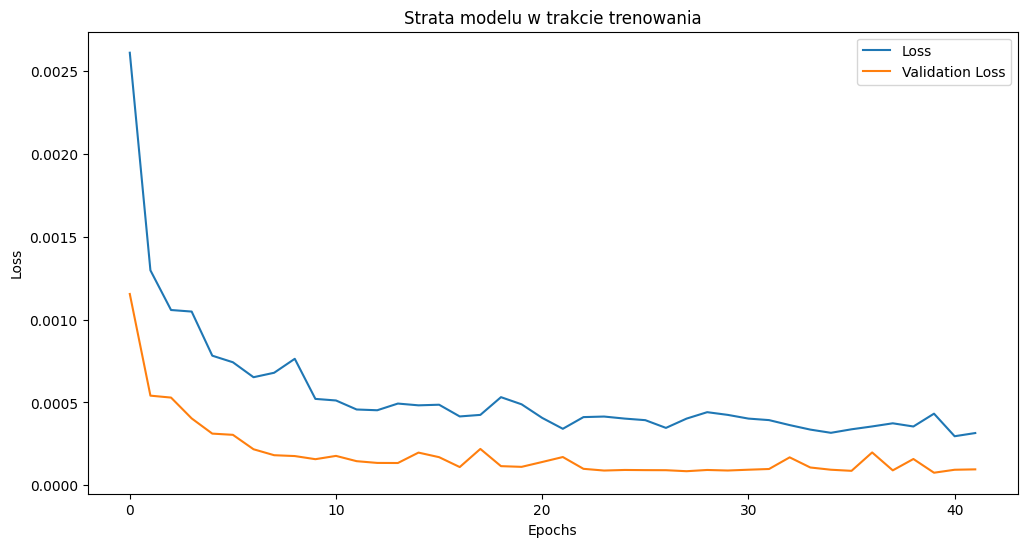

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Załaduj dane (zamień 'AAPL.csv' na rzeczywistą ścieżkę pliku)
data = pd.read_csv('sample_data/AAPLv2.csv')

# Konwersja kolumny 'Date' na format daty i ustawienie jako indeks
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Wybór kolumny 'Close' jako wartości do przewidywania
closing_prices = data[['Close']].values

# Normalizacja danych (skalowanie do zakresu 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Tworzenie sekwencji dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definiowanie długości sekwencji (np. 100 dni)
seq_length = 100
X, y = create_sequences(closing_prices_scaled, seq_length)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Tworzenie modelu LSTM
model = Sequential()

# Pierwsza warstwa LSTM
model.add(LSTM(150, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Dropout (20%) zapobiega przeuczeniu

# Druga warstwa LSTM
model.add(LSTM(150, return_sequences=True))

# Trzecia warstwa LSTM
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))  # Dropout dla lepszej generalizacji

# Czwarta warstwa LSTM (ostatnia warstwa ukryta)
model.add(LSTM(150))
model.add(Dropout(0.2))  # Dropout (20%)

# Warstwa wyjściowa - zwraca jedną przewidywaną wartość
model.add(Dense(1))

# Kompilacja modelu
model.compile(loss='mean_squared_error', optimizer='adam')

# Wyświetlenie podsumowania modelu
model.summary()

# Wczesne zatrzymanie treningu w przypadku braku poprawy
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,
                        verbose=1, mode='auto', restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[monitor], verbose=1)

# Wizualizacja przebiegu uczenia
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Strata modelu w trakcie trenowania')
plt.legend()
plt.show()


# Part 6: Prognozy cen akcji Apple

Przewidywanie wartosci na zbiorze treningowym i testowym

🧐 Co można odczytać z tego wykresu?
Jak dobrze model przewiduje rzeczywiste ceny

Jeśli Train Predict dobrze pokrywa się z Real Apple Stock Price, to model dobrze nauczył się na danych treningowych.

Jeśli Test Predict jest blisko rzeczywistych wartości, to model dobrze generalizuje na nowe dane.

Czy model się przeuczył (overfitting)

Jeśli Train Predict dokładnie odwzorowuje dane, ale Test Predict odbiega od rzeczywistych wartości, to model mógł się przeuczyć.

Czy model ma przesunięcie czasowe (lag)

Jeśli Test Predict wygląda podobnie do Real Apple Stock Price, ale jest przesunięty w czasie, to model może mieć problem z dostosowaniem do aktualnych wartości.


Zielona linia – rzeczywista cena akcji Apple.

Czerwona linia – predykcja modelu na zbiorze treningowym.

Niebieska linia – predykcja modelu na zbiorze testowym.

Model dobrze odwzorowuje rzeczywiste ceny w fazie treningowej.

Czasami przewiduje większe skoki niż rzeczywiste ceny (nadmierna reakcja).

Model w miarę poprawnie podąża za trendem rzeczywistych danych.

Jednak występują pewne rozbieżności – zwłaszcza przy dużych zmianach cen.

Model LSTM ma trudność w przewidywaniu niespodziewanych skoków i spadków.

Widać to w okresach, gdzie ceny akcji gwałtownie rosną lub spadają – model często reaguje opóźnieniem.

✅ Dodanie cech wejściowych – np. wskaźników technicznych (RSI, MACD) lub informacji o rynku.
✅ Wypróbowanie innych modeli – np. GRU, Transformerów lub hybrydowego podejścia.
✅ Lepsza normalizacja danych – sprawdzenie wpływu różnych skalowań danych.
✅ Większa ilość danych – zwłaszcza w zakresie nagłych zmian cen.

💡 Podsumowanie:
Model LSTM całkiem nieźle przewiduje trend cen akcji Apple, ale ma problem z gwałtownymi zmianami. Można go ulepszyć poprzez dodanie dodatkowych cech lub tuning hiperparametrów. 🚀




150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


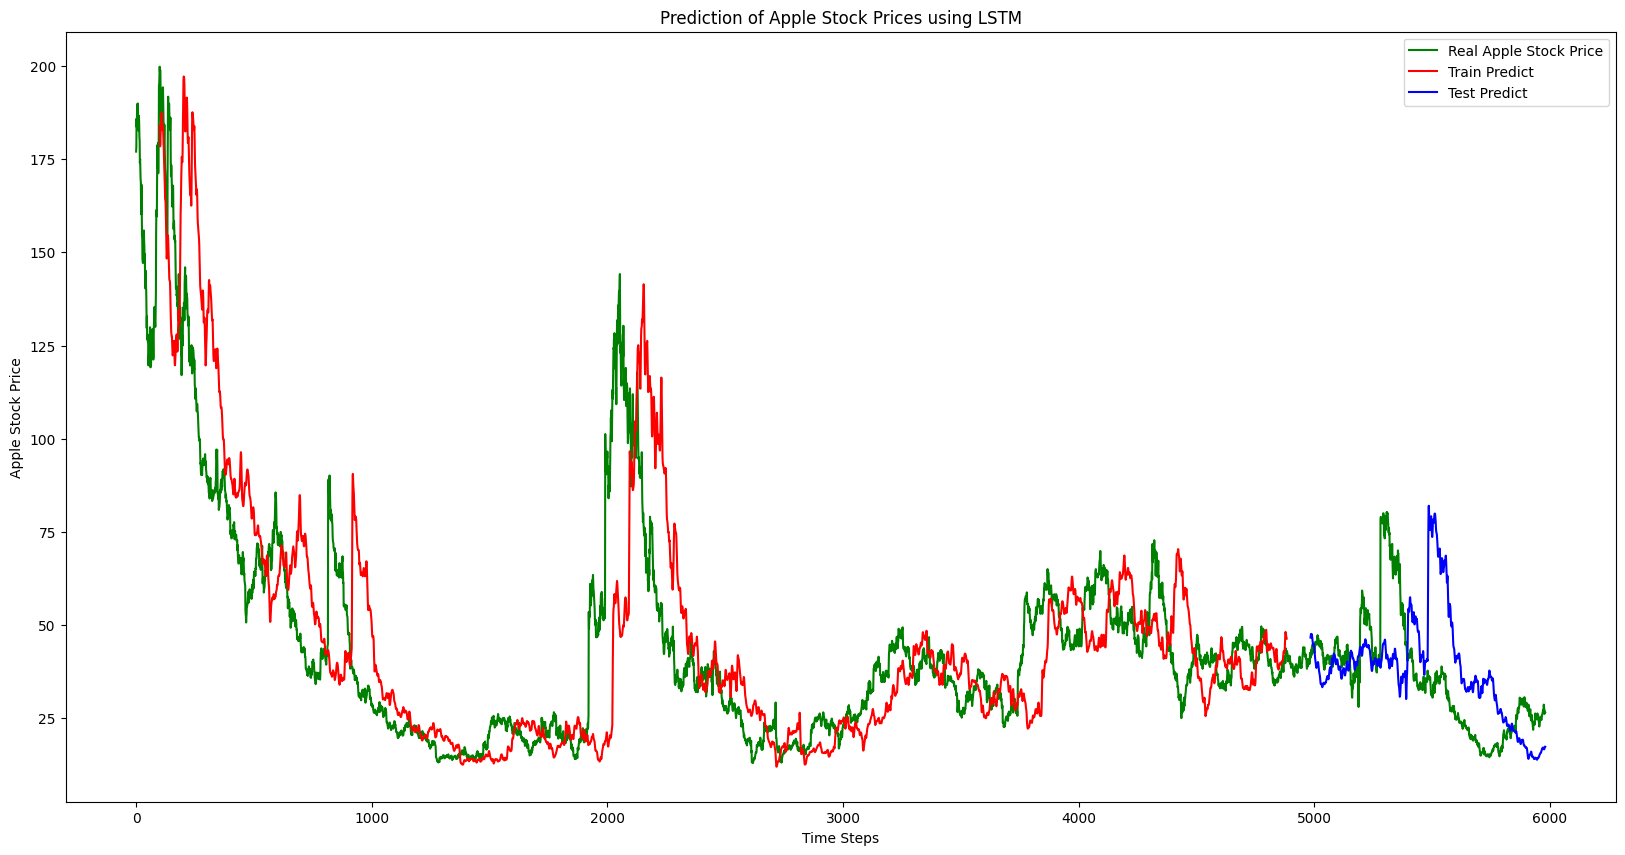

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych
data = pd.read_csv('sample_data/AAPLv2.csv')

# Konwersja kolumny 'Date' na format datetime i ustawienie jako indeks
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Pobranie wartości zamknięcia (Close) do analizy
closing_prices = data[['Close']].values

# Zakładam, że 'closing_prices' zawiera dane o cenach akcji
train_size = int(len(closing_prices) * 0.8)  # 80% na trening, 20% na test
train_data = closing_prices[:train_size]  # Dane treningowe
test_data = closing_prices[train_size:]   # Dane testowe

# Przewidywanie wartości dla zbioru treningowego i testowego
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Przywracanie rzeczywistych wartości poprzez odwrotne skalowanie
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_actual = scaler.inverse_transform(y)  # Oryginalne ceny

# Ustawienie liczby kroków do przewidywania
look_back = seq_length

# Tworzenie pustej macierzy dla wykresu przewidywań na zbiorze treningowym
trainPredictPlot = np.empty_like(y_actual)
trainPredictPlot[:, :] = np.nan  # Wypełnienie wartościami NaN
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Tworzenie pustej macierzy dla wykresu przewidywań na zbiorze testowym
testPredictPlot = np.empty_like(y_actual)
testPredictPlot[:, :] = np.nan  # Wypełnienie wartościami NaN

# Obliczenie poprawnych indeksów do przypisania test_predict
start_idx = len(train_predict) + (look_back * 2)
end_idx = start_idx + len(test_predict)

# Zapewnienie, że indeksy nie wychodzą poza zakres
if end_idx > len(testPredictPlot):
    end_idx = len(testPredictPlot)

# Przypisanie testowych przewidywań do wykresu
testPredictPlot[start_idx:end_idx, :] = test_predict[:end_idx - start_idx]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(20, 10))

# Rysowanie rzeczywistych wartości cen akcji
plt.plot(y_actual, label="Real Apple Stock Price", color="green")

# Rysowanie przewidywań dla zbioru treningowego
plt.plot(trainPredictPlot, label="Train Predict", color="red")

# Rysowanie przewidywań dla zbioru testowego
plt.plot(testPredictPlot, label="Test Predict", color="blue")

# Dodanie legendy i opisów
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.title('Prediction of Apple Stock Prices using LSTM')

# Wyświetlenie wykresu
plt.show()


#Part 7: Predykcja w przyszłosci
✅ Ładuje i przygotowuje dane – wczytuje ceny akcji Apple, normalizuje i dzieli na zbiór treningowy oraz testowy.
✅ Tworzy wejście dla modelu – pobiera ostatnie 100 wartości i używa ich do predykcji.
✅ Generuje predykcje – przewiduje kolejne 30 dni na podstawie wcześniejszych cen.
✅ Rysuje wykres – pokazuje rzeczywiste ceny akcji, dane testowe oraz przyszłą predykcję.


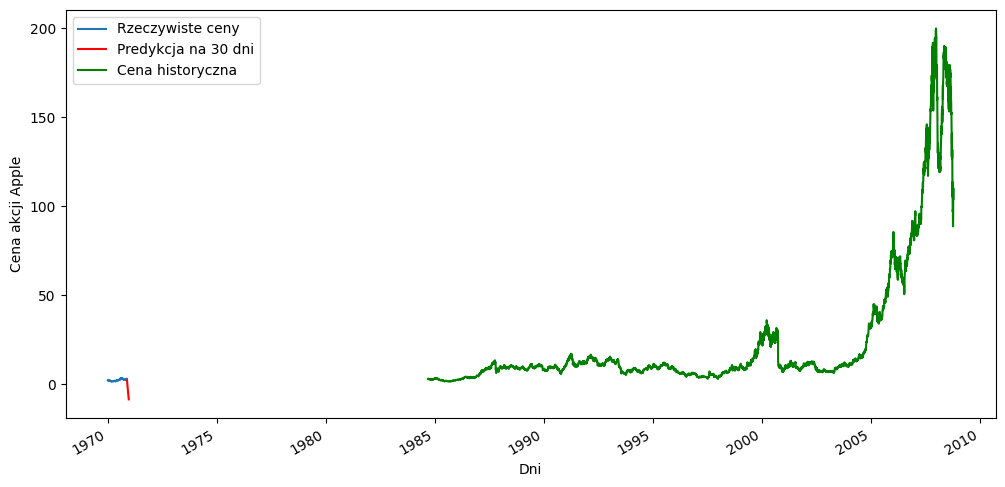

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Załaduj dane historyczne akcji
df1 = pd.read_csv('sample_data/AAPLv2.csv')  # Upewnij się, że plik jest dostępny
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

# Podział na dane treningowe i testowe
train_data = df1.iloc[:2880]  # Zakładamy, że pierwsze 2880 próbek to trening
test_data = df1.iloc[2880:]  # Pozostałe to test

# Normalizacja danych
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_data[['Adj Close']])
test_scaled = scaler.transform(test_data[['Adj Close']])

# Przekształcenie danych testowych dla modelu
x_input = test_scaled[943:].reshape(1,-1)  # Wejście modelu z końcowych danych testowych
temp_input = list(x_input.flatten())  # Konwersja do listy

# Predykcja przyszłych wartości (np. na kolejne 30 dni)
n_future = 30  # Liczba dni do przewidzenia
lst_output = []

for i in range(n_future):
    x_input = np.array(temp_input[-100:]).reshape(1,-1)  # Pobranie ostatnich 100 wartości
    x_input = x_input.reshape((1, 100, 1))  # Dopasowanie kształtu do wejścia LSTM

    y_pred = model.predict(x_input, verbose=0)  # Predykcja pojedynczej wartości
    temp_input.append(y_pred[0][0])  # Dodanie wyniku do listy
    lst_output.append(y_pred[0][0])  # Zapisanie do wyników

# Odwrócenie normalizacji wyników
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

# Wizualizacja predykcji
day_new = np.arange(1, len(test_data[2880:]) + 1)  # Dni w testowym zbiorze
day_pred = np.arange(len(test_data[2880:]), len(test_data[2880:]) + n_future)  # Dni przyszłe

plt.figure(figsize=(12,6))
plt.plot(day_new, scaler.inverse_transform(test_scaled[2880:]), label="Rzeczywiste ceny")
plt.plot(day_pred, lst_output, label="Predykcja na 30 dni", color='red')
df1['Adj Close'].plot(label="Cena historyczna", color='green')

plt.xlabel("Dni")
plt.ylabel("Cena akcji Apple")
plt.legend()
plt.show()


# Part 8: Kolejne predykcje w przyszłości
wykres przedstawia porównanie rzeczywistych cen akcji (niebieska linia) oraz prognozowanych wartości przez model (czerwona linia). Dodatkowo zaznaczono anomalie (zielone kropki).

Dokładność predykcji – Model bardzo dobrze dopasowuje się do rzeczywistych wartości, zwłaszcza w późniejszych okresach (większość niebieskiej i czerwonej linii się pokrywa).

Anomalie – Zielone kropki na początku wykresu wskazują momenty, gdzie przewidywania modelu znacząco odbiegały od rzeczywistości. Może to wynikać z:

nagłych skoków cen, które model nie przewidział,

błędów w danych wejściowych,

braku wystarczającej ilości danych do dokładnego przewidywania w tym okresie.

Stabilność predykcji – Po początkowych anomaliach model wydaje się coraz lepiej odzwierciedlać rzeczywiste wartości, co sugeruje, że dobrze nauczył się wzorców cenowych.

Silny trend wzrostowy i spadkowy – W środkowej części wykresu widać wyraźny skok cen, który model poprawnie odwzorował.

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Typ predictions: <class 'numpy.ndarray'>, rozmiar: 1197
Typ ytest: <class 'numpy.ndarray'>, rozmiar: 1197
Typ outliers: <class 'pandas.core.series.Series'>, rozmiar: Nieznany


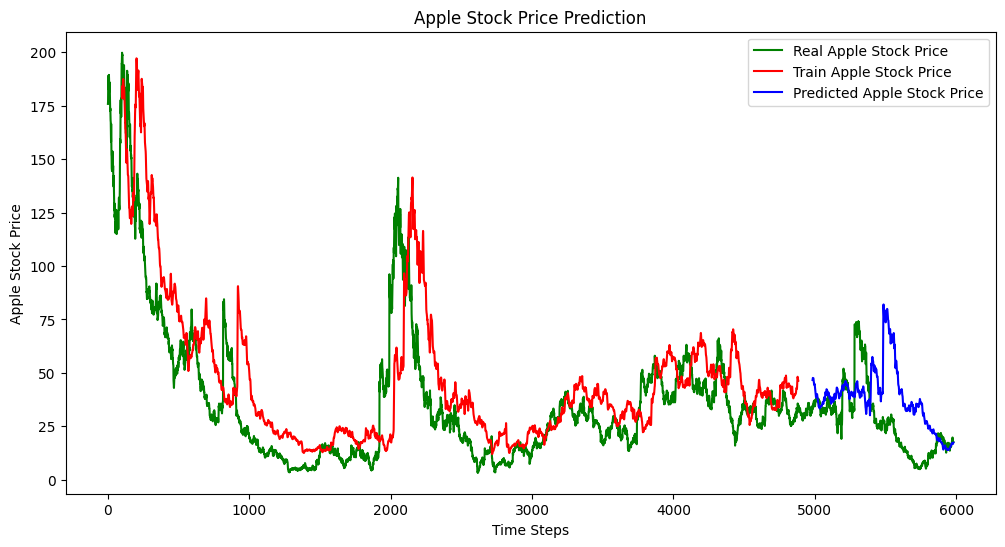

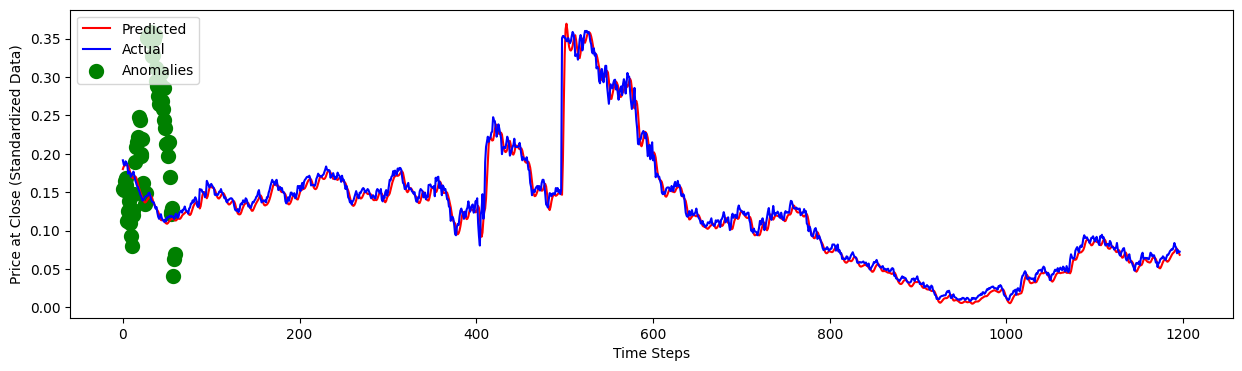

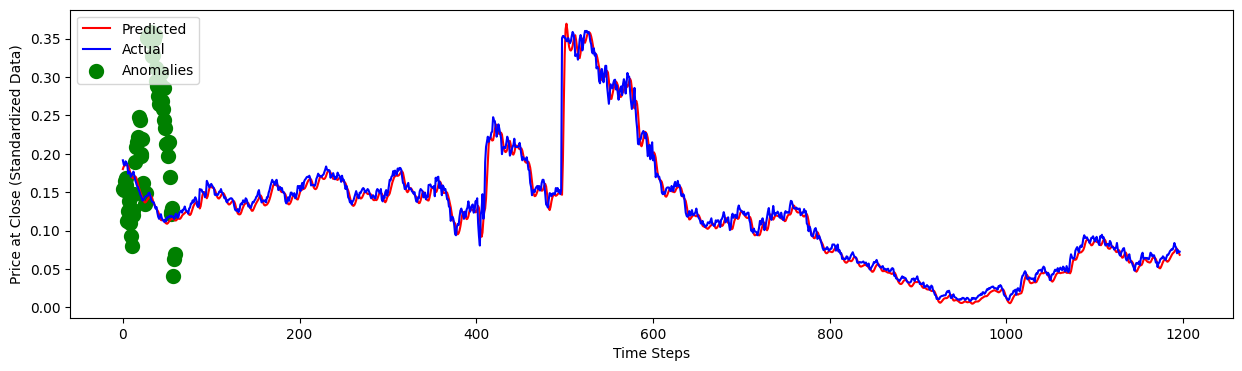

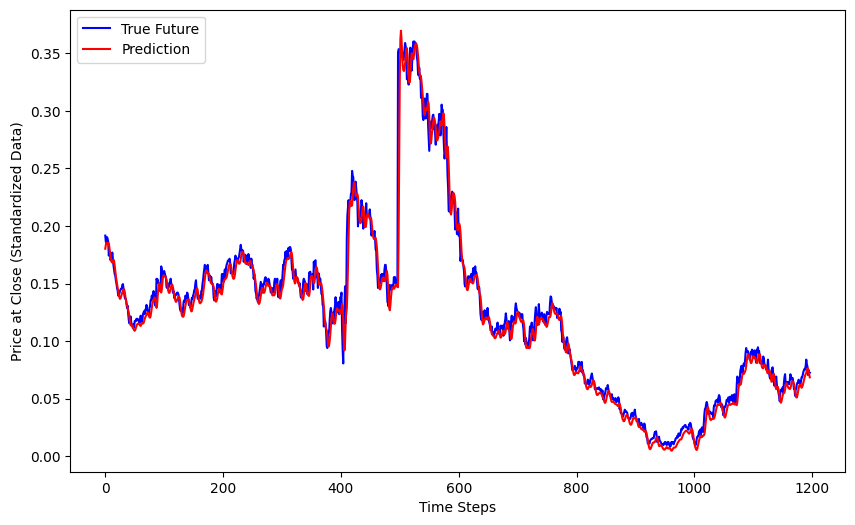

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Jeśli nie masz jeszcze predictions, możesz je stworzyć np. w ten sposób:
predictions = model.predict(X_test)  # Model zwraca przewidywane wartości
ytest = y_test  # Zakładając, że masz rzeczywiste wartości cen testowych

# Outliers (anomalii) można wykryć np. jako punkty o dużej różnicy między rzeczywistością a predykcją
import pandas as pd
errors = np.abs(ytest - predictions)  # Błąd bezwzględny
threshold = np.percentile(errors, 95)  # Próg np. 95 percentyl
outliers = pd.Series(ytest[errors > threshold])  # Wybór wartości odstających

print(f"Typ predictions: {type(predictions)}, rozmiar: {len(predictions) if isinstance(predictions, (list, np.ndarray)) else 'Nieznany'}")
print(f"Typ ytest: {type(ytest)}, rozmiar: {len(ytest) if isinstance(ytest, (list, np.ndarray)) else 'Nieznany'}")
print(f"Typ outliers: {type(outliers)}, rozmiar: {len(outliers) if isinstance(outliers, (list, np.ndarray)) else 'Nieznany'}")

# Wizualizacja wyników predykcji
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y), color='green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# Tworzenie subplots dla predykcji vs rzeczywiste wartości
fig, axs = plt.subplots(figsize=(15, 4))
axs.plot(predictions, color='red', label='Predicted')
axs.plot(ytest, color='blue', label='Actual')
axs.scatter(outliers.index, outliers, color='green', linewidth=5.0, label='Anomalies')
axs.set_xlabel('Time Steps')
axs.set_ylabel('Price at Close (Standardized Data)')
axs.legend(loc='upper left')
plt.show()

# Kolejny wykres predykcji vs rzeczywiste wartości
fig, axs = plt.subplots(figsize=(15, 4))
axs.plot(predictions, color='red', label='Predicted')
axs.plot(ytest, color='blue', label='Actual')
axs.scatter(outliers.index, outliers, color='green', linewidth=5.0, label='Anomalies')
axs.set_xlabel('Time Steps')
axs.set_ylabel('Price at Close (Standardized Data)')
axs.legend(loc='upper left')
plt.show()

# Wizualizacja przyszłych wartości vs rzeczywiste dane
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), label='True Future', color='blue')
plt.plot(np.arange(range_future), np.array(predictions), label='Prediction', color='red')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


Podaj rok do przewidzenia ceny akcji: 2025
Brak prognoz dla roku 2025. Spróbuj wcześniejszą datę.


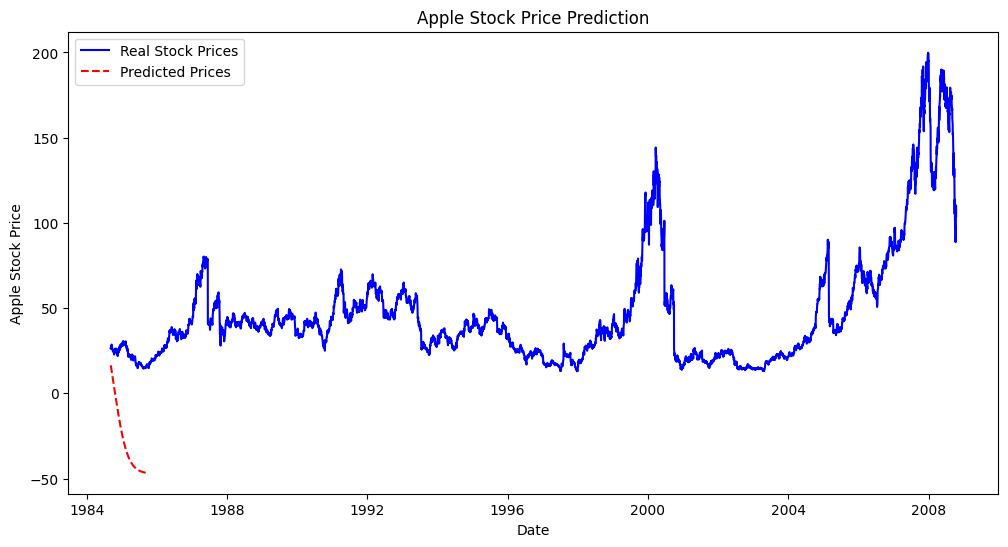

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Ustawienie liczby dni do przewidywania
future_days = 365  # Możemy przewidzieć 1 rok do przodu

# Pobranie ostatnich wartości do prognozy
x_input = closing_prices_scaled[-seq_length:].reshape(1, -1, 1)

# Tworzenie pustej listy na przewidywane wartości
lst_output = []

for i in range(future_days):
    prediction = model.predict(x_input, verbose=0)  # Prognoza modelu
    lst_output.append(prediction[0, 0])  # Dodanie wyniku do listy
    x_input = np.append(x_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)  # Aktualizacja wejścia

# Odwrócenie skalowania
predicted_prices = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Generowanie osi czasu dla prognozy
last_date = data.index[-1]  # Ostatnia data w danych
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# Tworzenie DataFrame z prognozami
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': predicted_prices.flatten()})
future_df.set_index('Date', inplace=True)

# Funkcja do zwracania prognozy dla podanego roku
def get_prediction_for_year(year):
    year = int(year)  # Konwersja na liczbę całkowitą
    filtered_df = future_df[future_df.index.year == year]  # Filtrujemy dane dla danego roku
    if filtered_df.empty:
        return f"Brak prognoz dla roku {year}. Spróbuj wcześniejszą datę."
    return filtered_df

# Pobranie roku od użytkownika
year_input = input("Podaj rok do przewidzenia ceny akcji: ")
result = get_prediction_for_year(year_input)
print(result)

# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_prices, label='Real Stock Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Close'], label='Predicted Prices', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()
